In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%config Completer.use_jedi = False

In [13]:
# Loading mean PSD of each mouse
wt=pd.read_csv('D:/Projects/SpikeSorting/matlab_files/wt_final.csv')
tg=pd.read_csv('D:/Projects/SpikeSorting/matlab_files/tg_final.csv')

In [14]:
wt['label']=0
tg['label']=1

In [15]:
df=pd.concat([wt,tg],axis=0,ignore_index=True)
names=df['name']
df.drop('name',axis=1,inplace=True)

# PairPlot

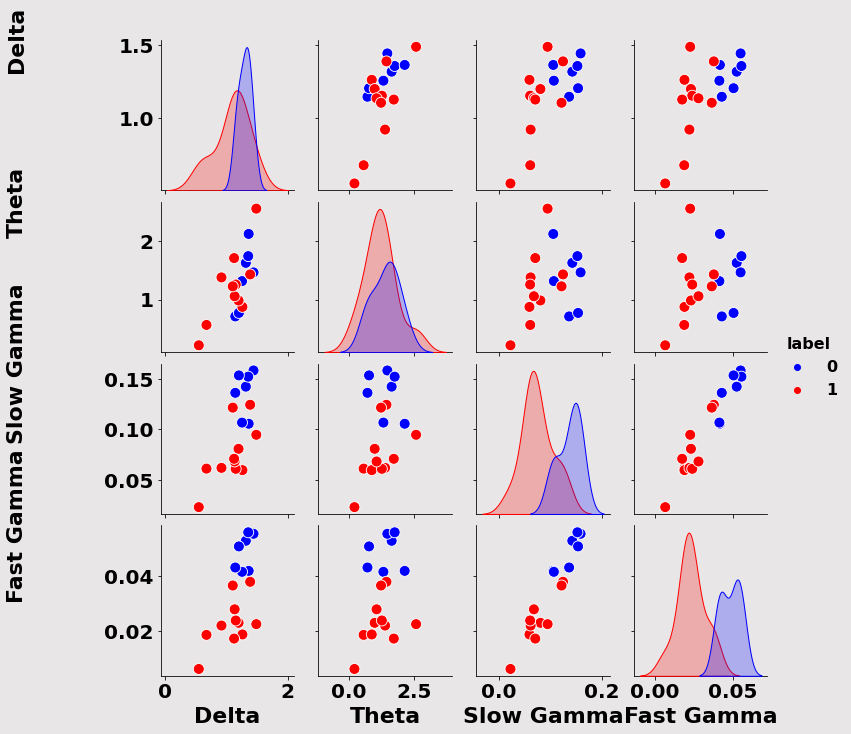

In [16]:
mpl.rcParams["font.size"]='16'
mpl.rcParams["figure.figsize"]=[6.0, 4.0]
mpl.rcParams["font.weight"]='bold'
mpl.rcParams['axes.labelpad']=5
mpl.rcParams["axes.labelweight"]='bold'
mpl.rcParams["axes.labelsize"] = 22
mpl.rcParams["xtick.labelsize"] = 20
mpl.rcParams["ytick.labelsize"] = 20
mpl.rcParams["figure.facecolor"]='#E8E6E6'
mpl.rcParams["axes.facecolor"]='#E8E6E6'
palette = {1:"red",
           0:"blue"}
plot_kws={"s": 120}
g=sns.pairplot(df,hue='label',palette=palette,plot_kws=plot_kws)

for ax in g.axes.flatten():
    
    ax.get_yaxis().set_label_coords(-1,1)

# Feature importance

In [19]:
data=df.to_numpy()
X=data[:,:-1]
y=data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
feature_names = [f"{df.columns[i]}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

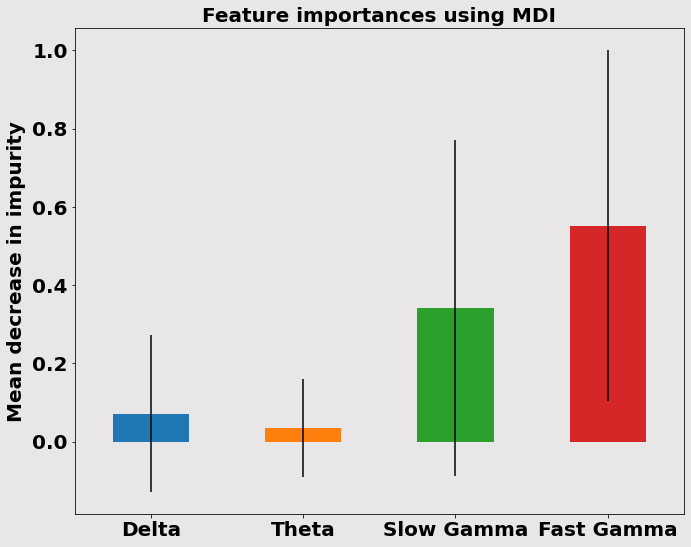

In [32]:
forest_importances = pd.Series(importances, index=feature_names)
# forest_importances = forest_importances.sort_values(ascending=False)
mpl.rcParams["font.size"]='20'
mpl.rcParams["font.weight"]='bold'
mpl.rcParams['axes.labelpad']=6
mpl.rcParams["axes.labelweight"]='bold'
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["xtick.labelsize"] = 20
mpl.rcParams["ytick.labelsize"] = 20
mpl.rcParams['axes.titlesize']=20
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams["figure.facecolor"]='#E8E6E6'
mpl.rcParams["axes.facecolor"]='#E8E6E6'
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
col_map = plt.get_cmap('tab10')
forest_importances.plot.bar(yerr=std, ax=ax,color=col_map.colors)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.tick_params(axis='x', labelrotation = 0)
# ax=plt.gca() #get the current axes
# PCM=ax.get_children()[2] #get the mappable, the 1st and the 2nd are the x and y axes
# plt.colorbar(PCM, ax=ax) 
fig.tight_layout()
plt.show()